In [236]:
import warnings
warnings.filterwarnings('ignore')
#-------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
#-------------------------------------------------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, activations, regularizers, optimizers, losses
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [130]:

sns.set(color_codes=True, style='darkgrid')
%matplotlib inline

In [131]:

print(sns.color_palette("muted", as_cmap=True))
sns.color_palette("muted")

['#4878D0', '#EE854A', '#6ACC64', '#D65F5F', '#956CB4', '#8C613C', '#DC7EC0', '#797979', '#D5BB67', '#82C6E2']


[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [5]:
print(sns.color_palette('colorblind', as_cmap=True))
sns.color_palette('colorblind')

['#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC', '#CA9161', '#FBAFE4', '#949494', '#ECE133', '#56B4E9']


[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [132]:
features_df = pd.read_csv('/content/drive/MyDrive/datasets/NN project RA academy - amazon/features data.csv')
sales_csv = pd.read_csv('/content/drive/MyDrive/datasets/NN project RA academy - amazon/sales data.csv')
stores_df = pd.read_csv('/content/drive/MyDrive/datasets/NN project RA academy - amazon/stores data.csv')

# General Analysis

### features data

In [ ]:
features_df.sample(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
2382,14,28/05/2010,69.27,2.899,NaN,NaN,NaN,NaN,NaN,182.046418,8.899,False
3536,20,05/08/2011,77.80,3.842,NaN,NaN,NaN,NaN,NaN,208.719238,7.274,False
1258,7,12/04/2013,34.79,3.642,1731.11,28.55,25.47,89.14,1032.44,201.070571,6.953,False
2738,16,02/04/2010,36.19,2.725,NaN,NaN,NaN,NaN,NaN,189.704822,6.842,False
3156,18,15/04/2011,49.91,3.823,NaN,NaN,NaN,NaN,NaN,134.278467,8.975,False


In [ ]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
missing_df = pd.DataFrame(features_df.isnull().sum(), columns=['Missing Count'])
missing_df["Missing %"] = np.round(missing_df['Missing Count']/8190, 2)
missing_df

,Missing Count,Missing %
Store,0,0.00
Date,0,0.00
Temperature,0,0.00
Fuel_Price,0,0.00
MarkDown1,4158,0.51
MarkDown2,5269,0.64
MarkDown3,4577,0.56
MarkDown4,4726,0.58
MarkDown5,4140,0.51
CPI,585,0.07


In [ ]:
features_df.duplicated().sum()

0

In [ ]:
def univariate_n(x, figsize, transformed=None, color='blue'):
    sns.set_style('darkgrid')
    f, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=1, ncols=4, figsize=figsize)
    sns.distplot(x, ax=ax1, color=color)
    ax1.set_title(f"Distribution of {x.name}")
    sns.boxplot(x, ax=ax2, color=color)
    ax2.set_title("Boxplot")
    sns.kdeplot(x, cumulative=True, ax=ax3, color=color)
    ax3.set_title("CDF")
    st.probplot(x, plot=ax4)
    ax4.set_title("QQ plot")
    f.suptitle("Univriate Analysis for {}".format(transformed + ' '+ x.name if transformed else x.name))

In [ ]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


- The markdown columns are all left skewed because of extreme values in the right side.
- The CPI, unemployment, fuel_price and temperature columns are almost normal. 

In [ ]:
pd.value_counts(features_df.IsHoliday)

False    7605
True      585
Name: IsHoliday, dtype: int64

In [133]:
features_df.Date = pd.to_datetime(features_df.Date)
type(features_df.Date[1])

pandas._libs.tslibs.timestamps.Timestamp

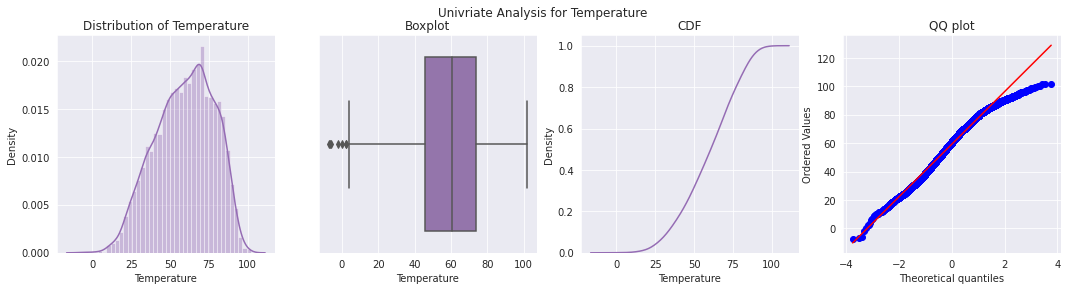

In [ ]:
univariate_n(features_df.Temperature, figsize=(18,4), color='#956CB4');

- The mean temperature of a typical day was almst 60 (celcius).
- There are a few outliers in the far left indicating colder days.
- The distribution is normal.

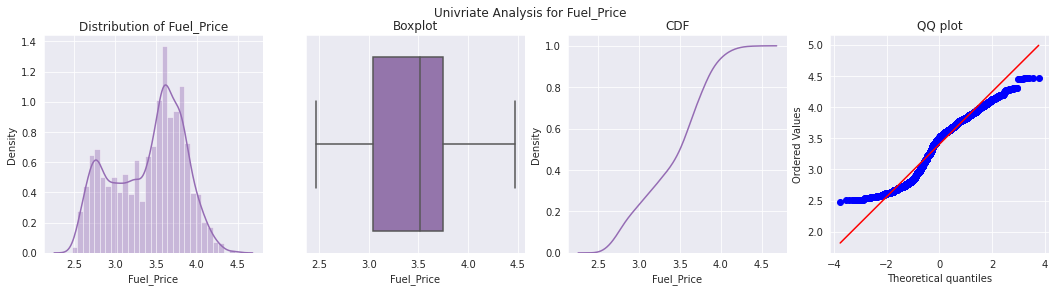

In [ ]:
univariate_n(features_df.Fuel_Price, figsize=(18,4), color='#956CB4');

-  The feul price distribuition is bimodal. For most of the days, it has been 2.7 or 3.7.
-  This might have increased with time. 

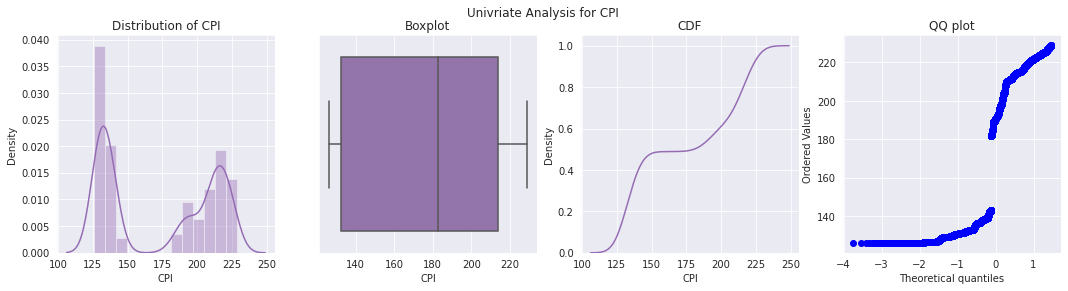

In [ ]:
univariate_n(features_df.CPI, figsize=(18,4), color='#956CB4');

- The CPI has a bimodal distribution. Most of the time, it has been either 130 or 220.

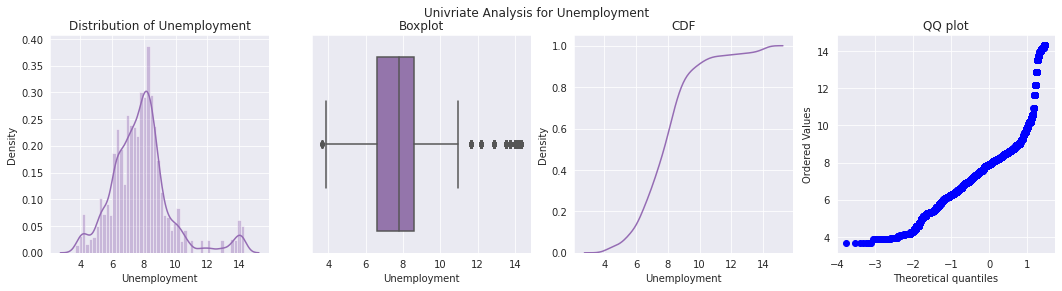

In [ ]:
univariate_n(features_df.Unemployment, figsize=(18,4), color='#956CB4');

**Analyzing the Markdowns Distributions**

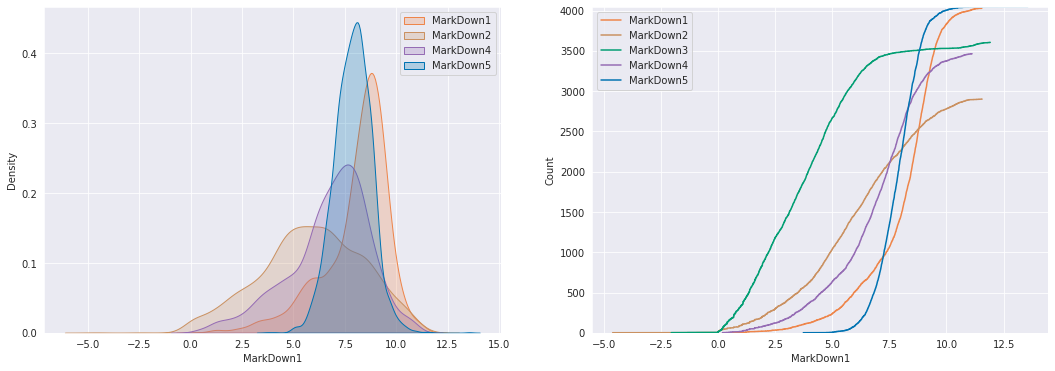

In [ ]:
f, (ax, ax_) = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.kdeplot(np.log1p(features_df.MarkDown1), ax=ax, color='#EE854A',  fill=True,  label="MarkDown1")
sns.kdeplot(np.log1p(features_df.MarkDown2), ax=ax, color='#CA9161',  fill=True,  label="MarkDown2")
sns.kdeplot(np.log1p(features_df.MarkDown3), ax=ax, color='#029E73',  fill=True,  label="MarkDown3")
sns.kdeplot(np.log1p(features_df.MarkDown4), ax=ax, color='#956CB4',  fill=True,  label="MarkDown4")
sns.kdeplot(np.log1p(features_df.MarkDown5), ax=ax, color='#0173B2',  fill=True,  label="MarkDown5")

sns.ecdfplot(np.log1p(features_df.MarkDown1), ax=ax_, color='#EE854A', label="MarkDown1", stat='count')
sns.ecdfplot(np.log1p(features_df.MarkDown2), ax=ax_, color='#CA9161', label="MarkDown2", stat='count')
sns.ecdfplot(np.log1p(features_df.MarkDown3), ax=ax_, color='#029E73', label="MarkDown3", stat='count')
sns.ecdfplot(np.log1p(features_df.MarkDown4), ax=ax_, color='#956CB4', label="MarkDown4", stat='count')
sns.ecdfplot(np.log1p(features_df.MarkDown5), ax=ax_, color='#0173B2', label="MarkDown5", stat='count');
ax.legend();
ax_.legend();

- Markdown 1 and 5 has the least amount of missing values. But they also made the hisghest overall sales

### sales data

In [ ]:
sales_csv.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [ ]:
sales_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
missing_df = pd.DataFrame(sales_csv.isnull().sum(), columns=['Missing Count'])
missing_df["Missing %"] = np.round(missing_df['Missing Count']/421570, 2)
missing_df

,Missing Count,Missing %
Store,0,0.0
Dept,0,0.0
Date,0,0.0
Weekly_Sales,0,0.0
IsHoliday,0,0.0


In [ ]:
missing_df.duplicated().sum()

4

In [ ]:
sales_csv.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.00,11.00,22.00,33.0000,45.00
Dept,421570.0,44.260317,30.492054,1.00,18.00,37.00,74.0000,99.00
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.94,2079.65,7612.03,20205.8525,693099.36


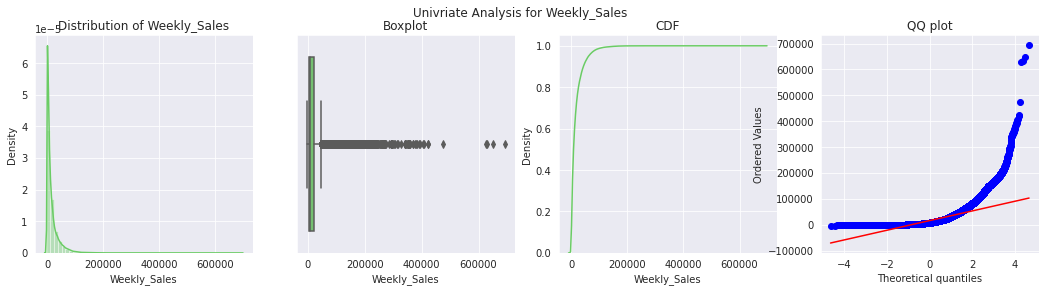

In [ ]:
univariate_n(sales_csv.Weekly_Sales, figsize=(18,4), color='#6ACC64');

In [ ]:
sales_csv.Dept.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65])

In [134]:
sales_csv.Date = pd.to_datetime(sales_csv.Date)
type(sales_csv.Date[2])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
temp = sales_csv[['Date', 'Weekly_Sales']]
temp.set_index('Date', drop=True, inplace=True)
temp = temp.squeeze(axis=1)

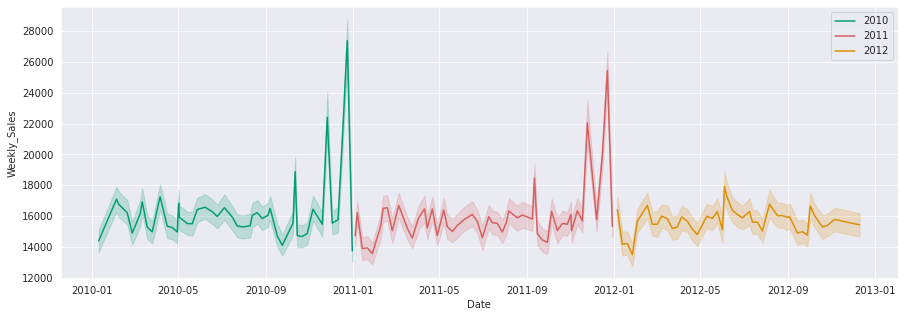

In [ ]:
f, ax2 = plt.subplots(figsize=(15,5))
sns.lineplot(x=temp['2010'].index, y=temp['2010'], color='#029E73', label='2010', ax=ax2)
sns.lineplot(x=temp['2011'].index, y=temp['2011'], color='#D65F5F', label='2011', ax=ax2)
sns.lineplot(x=temp['2012'].index, y=temp['2012'], color='#DE8F05', label='2012', ax=ax2);

- It can be observed that post october, in 2010 and 2011, there has been huge spikes in weekly sales

**Month-wise Group aggregate of weekly sales**

In [ ]:
temp.resample('M').agg({'mean','median','min','max','sum'}).sort_values(by='mean', ascending=False).head(10)

,mean,min,median,max,sum
Date,,,,,
2011-12-31,19154.569311,-798.0,9105.530,341308.00,2.293760e+08
2010-12-31,18285.014095,-698.0,8749.935,406988.63,3.235716e+08
2010-11-30,18118.582008,-1098.0,8522.570,693099.36,1.587731e+08
2011-11-30,17069.858089,-515.0,7831.230,649770.18,2.534703e+08
2012-06-30,16456.816992,-224.0,7594.510,224917.94,2.923883e+08
2010-06-30,16278.409330,-100.0,8158.570,204695.13,1.424361e+08
2010-02-28,16244.436211,-1750.0,8059.515,205250.96,1.915869e+08
2012-08-31,16187.597099,-771.9,7756.560,206575.90,1.916126e+08
2012-05-31,16040.929182,-379.0,7670.585,192860.85,1.422830e+08


- The top months have be Dec and Nov of 2010 and 2011.
- In 2012, June, August and May had almost equal and top mean weekly sales aggregate.

**Day-wise Group aggregate of weekly sales**

In [ ]:
temp.resample('D').agg({'mean','median','min','max','sum'}).sort_values(by='mean', ascending=False).head(10)

,mean,min,median,max,sum
Date,,,,,
2010-12-24,27378.692693,-147.00,13832.275,406988.63,80931415.60
2011-12-23,25437.146122,-649.00,12685.690,341308.00,76998241.31
2010-11-26,22403.336705,-159.00,10328.435,693099.36,65821003.24
2011-11-25,22043.563476,-169.98,9632.310,649770.18,66593605.26
2010-12-17,20892.463619,-372.90,10614.750,268789.69,61820799.85
2011-12-16,19942.149333,-498.00,9836.400,210877.54,60085695.94
2010-10-12,18882.893619,-496.00,9251.665,221013.44,55666770.39
2011-09-12,18458.853056,-159.00,8732.805,227088.13,55561147.70
2012-06-04,17935.741157,-63.32,8538.090,224917.94,53502315.87


**Anual Group aggregate of weekly sales**

In [ ]:
temp.resample('Y').agg({'mean','median','min','max','sum'}).sort_values(by='mean', ascending=False)

,mean,min,median,max,sum
Date,,,,,
2010-12-31,16270.275737,-4988.94,7964.300,693099.36,2.288886e+09
2011-12-31,15954.070675,-3924.00,7522.020,649770.18,2.448200e+09
2012-12-31,15694.948597,-1699.00,7365.095,233140.32,2.000133e+09


- 2010 had the highest average weekly sales of $16270.27.


- The maximum sales worth $693099 happened on Nov 26.

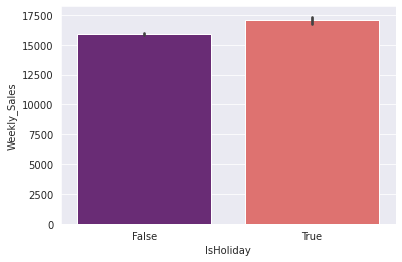

In [ ]:
sns.barplot(x=sales_csv.IsHoliday, y=sales_csv.Weekly_Sales, palette='magma');

### stores data

In [ ]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
missing_df = pd.DataFrame(stores_df.isnull().sum(), columns=['Missing Count'])
missing_df["Missing %"] = np.round(missing_df['Missing Count']/421570, 2)
missing_df

,Missing Count,Missing %
Store,0,0.0
Type,0,0.0
Size,0,0.0


In [ ]:
pd.value_counts(stores_df.Type)

A    22
B    17
C     6
Name: Type, dtype: int64

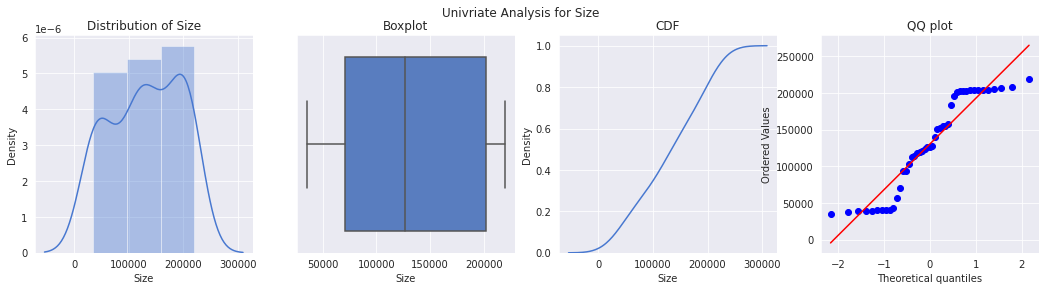

In [ ]:
univariate_n(stores_df.Size, figsize=(18,4), color='#4878D0')

- There are 3 majr types of stores in terms of size.

In [ ]:
stores_df.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [135]:
print(sales_csv.shape)
print(stores_df.shape)
print(features_df.shape)

(421570, 5)
(45, 3)
(8190, 12)


In [136]:
ss = pd.merge(sales_csv, stores_df,'left',on='Store')

In [137]:
ssf = pd.merge(ss, features_df, 'left', on=['Store', 'Date', 'IsHoliday'])

In [138]:
ssf.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [139]:
ssf.dropna(inplace=True)
ssf.shape

(97056, 16)

**Feature Engineering: Generating new features from the date column**

In [140]:
ssf['Year'] = ssf.Date.apply(lambda x: x.year)
ssf['month'] = ssf.Date.apply(lambda x: x.month)
ssf['week_no'] = ssf.Date.dt.weekofyear
ssf['is_weekend'] = ssf.Date.apply(lambda x: 1 if x.weekday() >= 5 else 0)

In [ ]:
ssf.groupby('Year').mean()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,month,week_no,is_weekend
Year,,,,,,,,,,,,,,,,,
2011,20.052738,44.345682,20824.810004,0.268176,154882.520337,42.790514,3.388741,5327.760630,8323.185777,9176.465539,1588.389113,6837.831208,173.295907,7.674560,10.129978,42.356838,0.11674
2012,20.279013,44.234450,17212.881991,0.063223,155355.764204,60.846684,3.674191,9687.193628,2575.515941,52.521456,4613.065466,4944.164191,175.129816,7.351217,5.501057,21.969843,0.00000


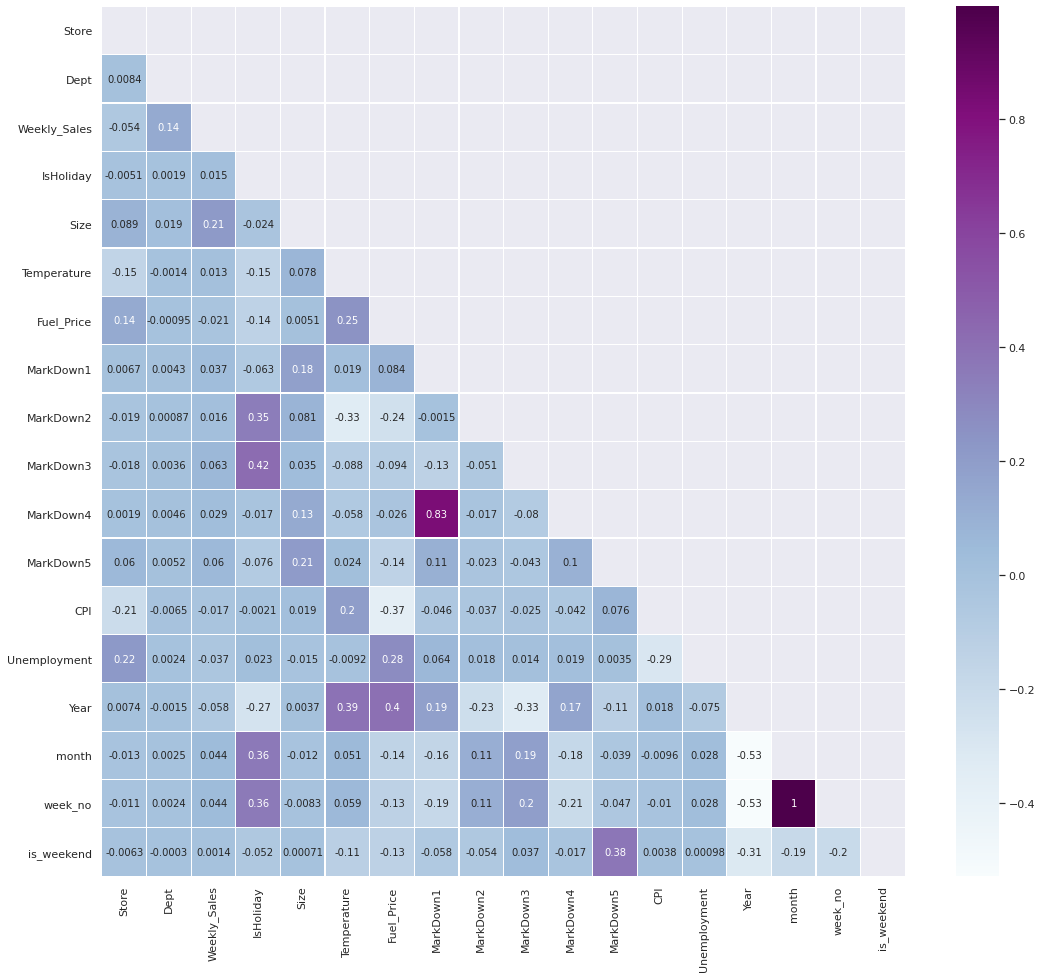

In [ ]:
corrdf = ssf.corr()
plt.figure(figsize=(18,16))
mask=np.triu(np.ones_like(corrdf))
sns.heatmap(corrdf, cmap='BuPu', annot=True, linewidths=0.2, mask=mask)

- Month and Week_No has extremely high correlation with each other. Hence week_no can be removed as it has high cardinality, and higher correlation with MarkDown3.

- MarkDown1 and MarkDown4 also have very high correlation with each other. Hence one of them can be removed.

In [ ]:
max_sales_dept = ssf.groupby('Dept').max()
max_sales_dept.sort_values('Weekly_Sales', ascending=False, inplace=True)
max_sales_dept.reset_index(inplace=True)
max_sales_dept[:10]

,Dept,Store,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,month,week_no,is_weekend
0,72,45,2012-11-05,630999.19,True,C,219622,95.91,4.301,88646.76,104519.54,141630.61,67474.85,108519.28,227.036936,12.89,2012,12,52,1
1,7,45,2012-11-05,341308.00,True,C,219622,95.91,4.301,88646.76,104519.54,141630.61,67474.85,108519.28,227.036936,12.89,2012,12,52,1
2,92,45,2012-11-05,257375.39,True,C,219622,95.91,4.301,88646.76,104519.54,141630.61,67474.85,108519.28,227.036936,12.89,2012,12,52,1
3,5,45,2012-11-05,208505.63,True,C,219622,95.91,4.301,88646.76,104519.54,141630.61,67474.85,108519.28,227.036936,12.89,2012,12,52,1
4,95,45,2012-11-05,185215.02,True,C,219622,95.91,4.301,88646.76,104519.54,141630.61,67474.85,108519.28,227.036936,12.89,2012,12,52,1
5,1,45,2012-11-05,168450.26,True,C,219622,95.91,4.301,88646.76,104519.54,141630.61,67474.85,108519.28,227.036936,12.89,2012,12,52,1
6,23,45,2012-11-05,165214.36,True,C,219622,95.91,4.301,88646.76,104519.54,141630.61,67474.85,108519.28,227.036936,12.89,2012,12,52,1
7,90,45,2012-11-05,161045.84,True,C,219622,95.91,4.301,88646.76,104519.54,141630.61,67474.85,108519.28,227.036936,12.89,2012,12,52,1
8,2,45,2012-11-05,151090.50,True,C,219622,95.91,4.301,88646.76,104519.54,141630.61,67474.85,108519.28,227.036936,12.89,2012,12,52,1
9,38,45,2012-11-05,138239.64,True,C,219622,95.91,4.301,88646.76,104519.54,141630.61,67474.85,108519.28,227.036936,12.89,2012,12,52,1


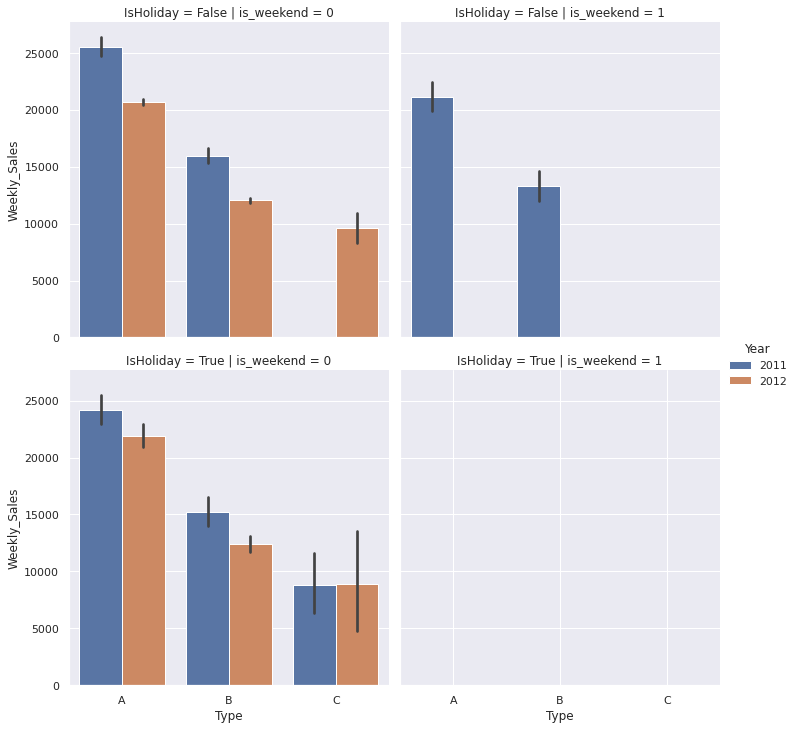

In [ ]:
sns.catplot(x='Type', y='Weekly_Sales', hue='Year', data=ssf, row='IsHoliday', col='is_weekend', kind='bar');

**Distribution of weekly sales by Type and Mean Monthly sales for each Type**

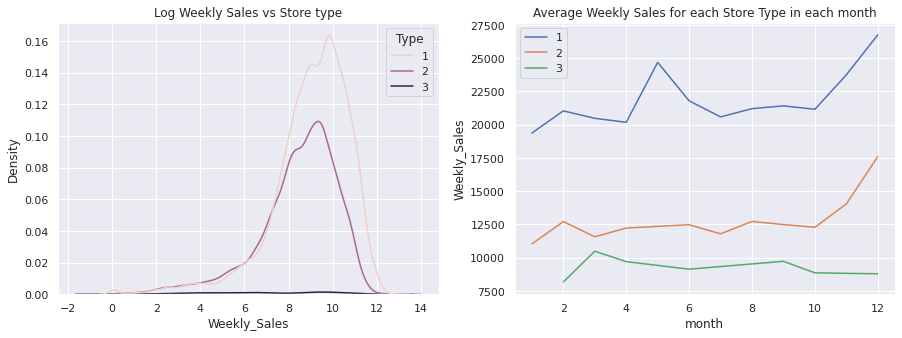

In [20]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax1.set_title("Log Weekly Sales vs Store type")
sns.kdeplot(np.log1p(ssf.Weekly_Sales), hue=ssf.Type, ax=ax1);

ax2.set_title("Average Weekly Sales for each Store Type in each month")
for st in ssf.Type.unique():
    filter = ssf[ssf.Type==st].groupby('month').mean().reset_index()
    sns.lineplot(x=filter['month'], y=filter['Weekly_Sales'], label=st, ax=ax2)

plt.show();

**Total sales by grpuped by week_no**

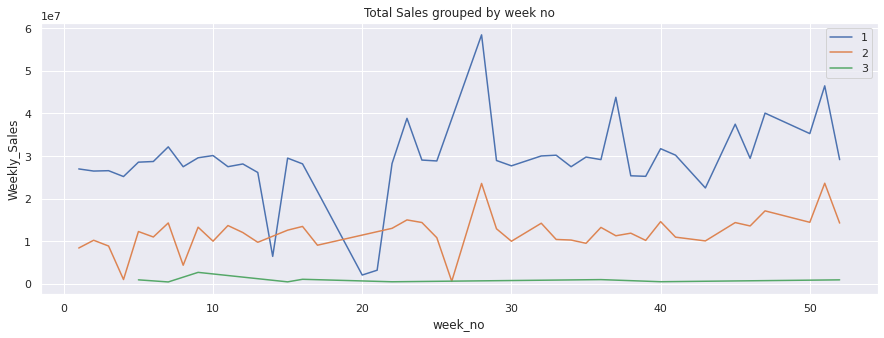

In [22]:
f, ax = plt.subplots(figsize=(15,5))
plt.title("Total Sales grouped by week no")
for st in ssf.Type.unique():
    filter = ssf[ssf.Type==st].groupby('week_no').sum().reset_index()
    sns.lineplot(x=filter['week_no'], y=filter['Weekly_Sales'], label=st, ax=ax)

plt.show();

- The sales for store type C is significantly lower than type B and A.
- Sales seem to be similar on holiday and a regular day. But the sales are considerably higher on weekdays than on weekends.

#### Feature Engineering: 

- The total sales for each type-week_no combination has good amount of variation.
- The Avrage sales per month seems to smooth over the above variation. 

Hence adding both these features

In [141]:
tot_sales_by_wk = ssf.groupby(['week_no', 'Type']).sum()['Weekly_Sales'].reset_index()
tot_sales_by_wk = tot_sales_by_wk.rename(columns = {'Weekly_Sales':'total_sales_by_week_by_type'})
ssf = ssf.merge(tot_sales_by_wk, how='left', on=['week_no', 'Type'])

In [142]:
avg_sales_by_mo = ssf.groupby(['month', 'Type']).mean()['Weekly_Sales'].reset_index()
avg_sales_by_mo = avg_sales_by_mo.rename(columns = {'Weekly_Sales':'avg_sales_by_month_by_type'})
ssf = ssf.merge(avg_sales_by_mo, how='left', on=['month', 'Type'])

#### Maximum sales by Department

In [61]:
max_sales_dept = ssf.groupby('Dept').max().sort_values('Weekly_Sales', ascending=False)
max_sales_dept.reset_index(inplace=True)
max_sales_dept[:5]

,Dept,Store,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,month,week_no,is_weekend,total_sales_by_week_by_type,avg_sales_by_month_by_type
0,72,45,2012-11-05,630999.19,True,C,219622,95.91,4.301,88646.76,104519.54,141630.61,67474.85,108519.28,227.036936,12.89,2012,12,52,1,58429313.92,26654.030548
1,7,45,2012-11-05,341308.00,True,C,219622,95.91,4.301,88646.76,104519.54,141630.61,67474.85,108519.28,227.036936,12.89,2012,12,52,1,58429313.92,26654.030548
2,92,45,2012-11-05,257375.39,True,C,219622,95.91,4.301,88646.76,104519.54,141630.61,67474.85,108519.28,227.036936,12.89,2012,12,52,1,58429313.92,26654.030548
3,5,45,2012-11-05,208505.63,True,C,219622,95.91,4.301,88646.76,104519.54,141630.61,67474.85,108519.28,227.036936,12.89,2012,12,52,1,58429313.92,26654.030548
4,95,45,2012-11-05,185215.02,True,C,219622,95.91,4.301,88646.76,104519.54,141630.61,67474.85,108519.28,227.036936,12.89,2012,12,52,1,58429313.92,26654.030548


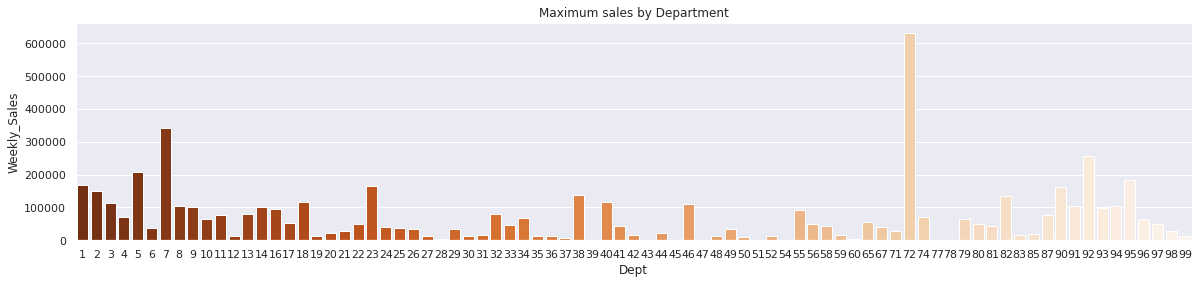

In [62]:
plt.figure(figsize=(20,4))
plt.title("Maximum sales by Department")
sns.barplot(x = max_sales_dept.Dept, y=max_sales_dept.Weekly_Sales, palette='Oranges_r');

#### Maximum sales by Store

In [57]:
max_sales_store = ssf.groupby('Store').max().sort_values('Weekly_Sales', ascending=False)
max_sales_store.reset_index(inplace=True)
max_sales_store[:5]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,month,week_no,is_weekend,total_sales_by_week_by_type,avg_sales_by_month_by_type
0,10,98,2012-10-26,630999.19,True,B,126512,89.92,4.301,42468.40,104519.54,141630.61,33345.34,36360.42,131.193097,7.874,2012,12,52,1,23590616.54,17501.686147
1,20,99,2012-10-26,392023.02,True,A,203742,79.20,4.044,58928.52,97740.99,101378.79,53603.99,35675.62,216.151590,7.293,2012,12,52,1,58429313.92,26654.030548
2,4,99,2012-11-05,385051.04,True,A,205863,83.86,3.881,50820.76,72413.71,83340.33,48086.64,28604.20,131.145333,5.143,2012,12,52,1,58429313.92,26654.030548
3,14,99,2012-10-26,375948.31,True,A,200898,82.99,4.044,78124.50,70574.85,89402.64,46081.94,15911.56,192.308899,8.684,2012,12,52,0,58429313.92,26654.030548
4,27,99,2012-10-26,368484.19,True,A,204184,82.08,4.203,62172.73,50076.68,73934.06,67474.85,33247.00,142.765750,8.253,2012,12,52,1,58429313.92,26654.030548


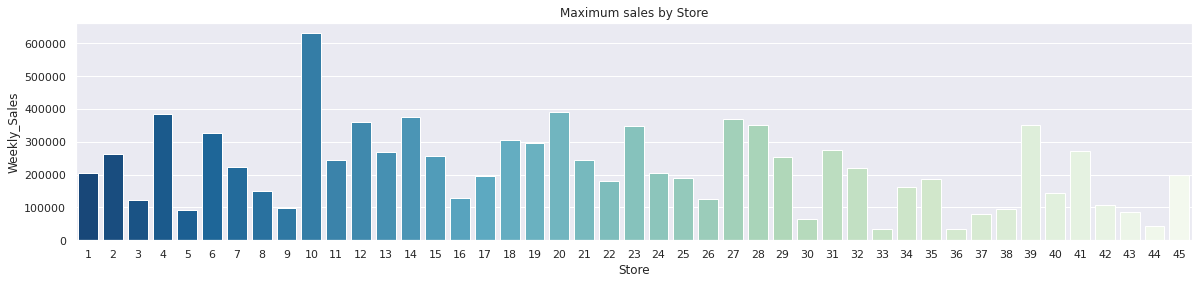

In [58]:
plt.figure(figsize=(20,4))
sns.barplot(x = max_sales_store.Store, y=max_sales_store.Weekly_Sales, palette='GnBu_r')
plt.title("Maximum sales by Store");

In [59]:
print('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r')

Accent Accent_r Blues Blues_r BrBG BrBG_r BuGn BuGn_r BuPu BuPu_r CMRmap CMRmap_r Dark2 Dark2_r GnBu GnBu_r Greens Greens_r Greys Greys_r OrRd OrRd_r Oranges Oranges_r PRGn PRGn_r Paired Paired_r Pastel1 Pastel1_r Pastel2 Pastel2_r PiYG PiYG_r PuBu PuBuGn PuBuGn_r PuBu_r PuOr PuOr_r PuRd PuRd_r Purples Purples_r RdBu RdBu_r RdGy RdGy_r RdPu RdPu_r RdYlBu RdYlBu_r RdYlGn RdYlGn_r Reds Reds_r Set1 Set1_r Set2 Set2_r Set3 Set3_r Spectral Spectral_r Wistia Wistia_r YlGn YlGnBu YlGnBu_r YlGn_r YlOrBr YlOrBr_r YlOrRd YlOrRd_r afmhot afmhot_r autumn autumn_r binary binary_r bone bone_r brg brg_r bwr bwr_r cividis cividis_r cool cool_r coolwarm coolwarm_r copper copper_r crest crest_r cubehelix cubehelix_r flag flag_r flare flare_r gist_earth gist_earth_r gist_gray gist_gray_r gist_heat gist_heat_r gist_ncar gist_ncar_r gist_rainbow gist_rainbow_r gist_stern gist_stern_r gist_yarg gist_yarg_r gnuplot gnuplot2 gnuplot2_r gnuplot_r gray gray_r hot hot_r hsv hsv_r icefire icefire_r inferno infern

In [143]:
ssf = ssf[ssf.Weekly_Sales > 0].copy(deep=True)

#### Manually encoding the categorical variables - IsHoliday and Type

In [144]:
ssf.IsHoliday = ssf.IsHoliday.map({True: 1, False: 0})
ssf.Type = ssf.Type.map({'A':1, 'B':2, 'C':3})

In [145]:
ssf.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,month,week_no,is_weekend,total_sales_by_week_by_type,avg_sales_by_month_by_type
0,1,1,2011-11-11,18689.54,0,1,151315,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,2011,11,45,0,37453917.62,23700.902755
1,1,1,2011-11-18,19050.66,0,1,151315,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,2011,11,46,0,29432902.50,23700.902755
2,1,1,2011-11-25,20911.25,1,1,151315,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,2011,11,47,0,40051653.11,23700.902755
3,1,1,2011-02-12,25293.49,0,1,151315,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,2011,2,6,1,28694824.82,21027.564969
4,1,1,2011-09-12,33305.92,0,1,151315,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,2011,9,37,0,43768384.66,21381.986514


#### Data Preparation

**Storing target variable in 'y' | Scaling 'y'**

In [198]:
y = ssf['Weekly_Sales'].copy()
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.to_numpy().reshape(1,-1)).reshape(-1)

**Funtion to segregate categotical, cat_to_emb, and numerical_variables from raw data | Scale the numerical variables | concat the scaled vars with low cardinal cat vars**

In [203]:
def splitDataForCatEmbeddigs(X):
    cat_to_emb_X = X.loc[:,['month','Type','Store','Dept']]
    cat_X = X.loc[:,['IsHoliday','is_weekend']]
    numerical_X = X.loc[:,['Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'total_sales_by_week_by_type', 'avg_sales_by_month_by_type']]
    
    ##Scaling Numerial vars
    scaler = StandardScaler()
    numerical_scaled = pd.DataFrame(scaler.fit_transform(numerical_X), columns=numerical_X.columns)

    ##concat cat vars with low cardinality and scaled numerical vars  
    other_features_X = pd.concat([numerical_scaled.reset_index(drop=True), cat_X.reset_index(drop=True)], axis=1)
    
    return cat_to_emb_X, other_features_X 

**Spiting data into train and val | transforming the X_train and X_val**

In [204]:
X_train, X_val, y_train, y_val = train_test_split(ssf.drop('Weekly_Sales', axis=1), y_scaled, test_size=0.2, random_state=123)

In [205]:
cat_to_emb_X_train, other_features_X_train =  splitDataForCatEmbeddigs(X_train)
cat_to_emb_X_val, other_features_X_val =  splitDataForCatEmbeddigs(X_val)

In [ ]:
# ssf_ohe = pd.concat([
#     pd.concat([pd.get_dummies(ssf.Type,drop_first=True, prefix='Type').reset_index(drop=True), pd.get_dummies(ssf.IsHoliday,drop_first=True, prefix='IsHoliday').reset_index(drop=True)], axis=1),
#     ssf.reset_index(drop=True)
# ], axis=1)
# ssf_ohe.drop(['Dept','IsHoliday','Date','Type'], axis=1, inplace=True)
# ssf_ohe.head(4)

In [ ]:
# y = ssf_ohe['Weekly_Sales'].copy()
# X = ssf_ohe.drop('Weekly_Sales', axis=1) 

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2)

In [ ]:
# dtree_test = DecisionTreeRegressor(random_state=123)
# dtree_test.fit(X_train, y_train)
# print('Train:', dtree_test.score(X_train, y_train))
# print('Test:', dtree_test.score(X_test, y_test))

### Categorical Embeddings

We have categorical variables such as store and Dept with high cardinality. Hence we want to encode them as embeddings using Neural networks.

In [ ]:
# Determining the size of the embedding layer for each variable
def determine_embSize(var):
    unique_cat = len(var.unique())
    return min(50, (unique_cat+1)//2)

In [ ]:
print(f"{ssf.Type.name} --> {determine_embSize(ssf.Type)}")
print(f"{ssf.IsHoliday.name} --> {determine_embSize(ssf.IsHoliday)}")
print(f"{ssf.month.name} --> {determine_embSize(ssf.month)}")
print(f"{ssf.is_weekend.name} --> {determine_embSize(ssf.is_weekend)}")
print(f"{ssf.Year.name} --> {determine_embSize(ssf.Year)}")
print(f"{ssf.Store.name} --> {determine_embSize(ssf.Store)}")
print(f"{ssf.Dept.name} --> {determine_embSize(ssf.Dept)}")

Type --> 2
IsHoliday --> 1
month --> 6
is_weekend --> 1
Year --> 1
Store --> 23
Dept --> 41


In [187]:
ssf.Dept.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 52, 54, 55, 56, 58,
       59, 60, 67, 71, 72, 74, 77, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92,
       93, 94, 95, 96, 97, 98, 99, 78, 51, 50, 43, 39, 65])

#### Defining Custom keras Layer to create categorical embeddings

In [206]:
class CreateCatEmbedding(layers.Layer):
    def __init__(self, input_dim, output_dim, rate, name):
        super(CreateCatEmbedding, self).__init__(name=name)
        self.inp = keras.Input(shape=(1,), name = name)
        self.emb = layers.Embedding(input_dim=input_dim, output_dim=output_dim, input_length = 1)
        self.dropout = layers.Dropout(rate=rate)
        self.flatten = layers.Flatten()
    def call(self, X, training=None):
        X = self.emb(X)
        if training:
            X = self.dropout(X)
        #X = tf.expand_dims(X, axis=0)
        return self.flatten(X)

#### Creating a composite custom linear layer

In [207]:
class CreateLinearLayer(layers.Layer):
    def __init__(self, out_features, kernel_regularizer, d_rate):
        super(CreateLinearLayer, self).__init__()
        self.linear = layers.Dense(out_features, kernel_regularizer=kernel_regularizer)
        self.bn = layers.BatchNormalization()
        self.dropout = layers.Dropout(rate=d_rate)
        self.activation = layers.ReLU()
    def call(self, X, training=None):
        X = self.linear(X)
        if training:
            X = self.dropout(X)
        X = self.bn(X)
        X = self.activation(X)
        return X

#### Defining Model

In [208]:
class SalesPredictorCatEmbd(tf.keras.Model):
    def __init__(self, kernel_regularizer, d_rate_linear=0.35, d_rate_linear_2=0.1, d_rate_emb=0.3):
        super(SalesPredictorCatEmbd, self).__init__()

        self.month_emb = CreateCatEmbedding(input_dim=13, output_dim=6, rate=d_rate_emb, name="month_embeddings")
        self.type_emb = CreateCatEmbedding(input_dim=4, output_dim=2, rate=d_rate_emb, name="type_embeddings")
        self.store_emb = CreateCatEmbedding(input_dim=46, output_dim=23, rate=d_rate_emb, name="store_embeddings")
        self.dept_emb = CreateCatEmbedding(input_dim=100, output_dim=41, rate=d_rate_emb, name="dept_embeddings")
        self.concat = layers.concatenate
        
        #The concatenated embeddings are of size: TensorShape([1, 4434 + 16])
        #Hence, we have a large number of neurons in the hidden layers
        self.linear_1 = CreateLinearLayer(3072, kernel_regularizer, d_rate_linear)
        self.linear_2 = CreateLinearLayer(2048, kernel_regularizer, d_rate_linear)
        self.linear_3 = CreateLinearLayer(1024, kernel_regularizer, d_rate_linear)
        self.linear_4 = CreateLinearLayer(512, kernel_regularizer, d_rate_linear)
        self.linear_5 = CreateLinearLayer(128, kernel_regularizer, d_rate_linear_2)
        self.linear_6 = CreateLinearLayer(32, kernel_regularizer, d_rate_linear_2)
        self.linear_7 = CreateLinearLayer(8, kernel_regularizer, d_rate_linear_2)
        self.out = layers.Dense(1)

    def call(self, X):
        other_features, cat_to_emb = X
        embeddings = self.concat(
            [
             self.month_emb(cat_to_emb[:,0]),
             self.type_emb(cat_to_emb[:,1]),
             self.store_emb(cat_to_emb[:,2]),
             self.dept_emb(cat_to_emb[:,3])
            ], axis=1
        )
        input = self.concat([embeddings, other_features], axis=1)
        X = self.linear_1(input)
        X = self.linear_2(X)
        X = self.linear_3(X)
        X = self.linear_4(X)
        X = self.linear_5(X)
        X = self.linear_6(X)
        X = self.linear_7(X)

        return self.out(X)

#### Hyperparameters

In [189]:
KERNEL_REGULARIZER = regularizers.l2(0.001)
D_RATE_LINEAR = 0.35
D_RATE_LINEAR_2 = 0.2
D_RATE_EMB = 0.35

LR = 0.001

MODEL = SalesPredictorCatEmbd(kernel_regularizer=KERNEL_REGULARIZER)
MODEL.compile(
    loss='mse', 
    optimizer=optimizers.Adam(learning_rate=LR)
)

#### Training

In [211]:
MODEL.fit(
    x=(other_features_X_train, cat_to_emb_X_train), 
    y=y_train,
    batch_size=32, 
    epochs=21, 
    validation_data=((other_features_X_val, cat_to_emb_X_val), y_val)
)

Epoch 1/21
2419/2419 [==============================] - 334s 138ms/step - loss: 193.5278 - val_loss: 142.8979
Epoch 2/21
2419/2419 [==============================] - 334s 138ms/step - loss: 61.5675 - val_loss: 35.3520
Epoch 3/21
2419/2419 [==============================] - 335s 139ms/step - loss: 10.3163 - val_loss: 5.7181
Epoch 4/21
2419/2419 [==============================] - 333s 138ms/step - loss: 5.5332 - val_loss: 3.0639
Epoch 5/21
2419/2419 [==============================] - 340s 141ms/step - loss: 3.1083 - val_loss: 1.8310
Epoch 6/21
2419/2419 [==============================] - 343s 142ms/step - loss: 2.3226 - val_loss: 1.7809
Epoch 7/21
2419/2419 [==============================] - 336s 139ms/step - loss: 2.2335 - val_loss: 1.1813
Epoch 8/21
2419/2419 [==============================] - 324s 134ms/step - loss: 1.4038 - val_loss: 1.0244
Epoch 9/21
2419/2419 [==============================] - 325s 134ms/step - loss: 1.1313 - val_loss: 0.8380
Epoch 10/21
2419/2419 [================

**The MSE value seems to be quite low and stable. The loss is observed to decrease steadily on each successive epoch, indicating that the choice of hyperparameters are reasonable.**

In [194]:
MODEL.summary()

Model: "sales_predictor_cat_embd_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
month_embeddings (CreateCatE multiple                  78        
_________________________________________________________________
type_embeddings (CreateCatEm multiple                  8         
_________________________________________________________________
store_embeddings (CreateCatE multiple                  1058      
_________________________________________________________________
dept_embeddings (CreateCatEm multiple                  4100      
_________________________________________________________________
create_linear_layer_35 (Crea multiple                  279552    
_________________________________________________________________
create_linear_layer_36 (Crea multiple                  6301696   
_________________________________________________________________
create_linear_layer_37 (Crea multiple   

**Saving the model and weights**

In [213]:
MODEL.save('/content/drive/MyDrive/RA_academy_catEmbd_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/RA_academy_catEmbd_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/RA_academy_catEmbd_model/assets


In [214]:
MODEL.save_weights("/content/drive/MyDrive/RA_academy_catEmbd_model_weights.h5")

**Loding model from disk and evaluation**

In [218]:
model = keras.models.load_model('/content/drive/MyDrive/RA_academy_catEmbd_model')

In [220]:
model.evaluate(x=(other_features_X_val, cat_to_emb_X_val), y=y_val, batch_size=32)

605/605 [==============================] - 19s 32ms/step - loss: 3.9226e-10


3.922595026573106e-10

In [222]:
y_pred = model.predict((other_features_X_val, cat_to_emb_X_val))

#### The Mopdel was trained on MSE. Hence calculating the MAE and R2_Score

In [234]:
mae = tf.keras.metrics.MeanAbsoluteError()
mae.update_state(y_pred.reshape(-1), y_val)
mae_score = mae.result().numpy()

In [243]:
print(f"The MAE is: {mae_score}")

The MAE is: 1.9805505871772766e-05


### Inference Report

- The neural Nework model has done well. The low MAE and MSE scores are due to large number of neurons in the initial hidden layers. 
- Most importantly, this is because, the embedding layer was made use to encode the each categorical variable into appropriately shaped embedding vector.
- https://arxiv.org/pdf/1907.01860.pdf 
- Training this model for 100 epochs would have taken approx 10 hours as one epoch took close to 5.2 min to train. Also the loss was decreasing exponentially for every epoch. So even 21 epochs was an overkill for this model.


- Alternatively, what could have been done is that:
    - the high cardinality categorical variables could have been eliminated altogether and replaed by target encoded numerical values. 
    - We could also do more feature engineering by grouping the data by store and dept and type to generate many numerical features such as mean sales per combination.

- Another approach would be to reduce the dimensionality of the data by doing PCA/autoencoders. This can then be bolstered by adding n_clusters as another dimensions by subjecting the reduced data to k-means algorithm.

- This way, the complexity and the computational requirements of the model could have been reduced.    